# Path Choice Plot

In [4]:
import os
import pandas as pd
OUTPUT_FOLDER = r"/Users/elizabeth/Documents/urbanlabs/MTC/SHRP2/tutorial/tta/output/capacity-demand"



In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
def choice_set_plot(paths_df, pax_list, value="probability", iteration=1):
    order = list(set(list(paths_df.description)))
    
    sns.set(style="whitegrid")
    fig, axs = plt.subplots(nrows=len(pax_list),figsize=(15,15),squeeze=False)
    for idx, pax in enumerate(pax_list):
        pax_paths_df = paths_df[paths_df["person_id"] == pax]
        sns.barplot(ax=axs.flat[idx], x="description", y=value, order=order,hue="pathfinding_iteration",  estimator=sum, data=pax_paths_df[pax_paths_df["iteration"]==1])
        axs.flat[idx].set_title("%s for %s: Iteration #%d" % (value, pax, iteration) )
        for tick in axs.flat[idx].get_xticklabels():
            tick.set_rotation(45)
                           
                           

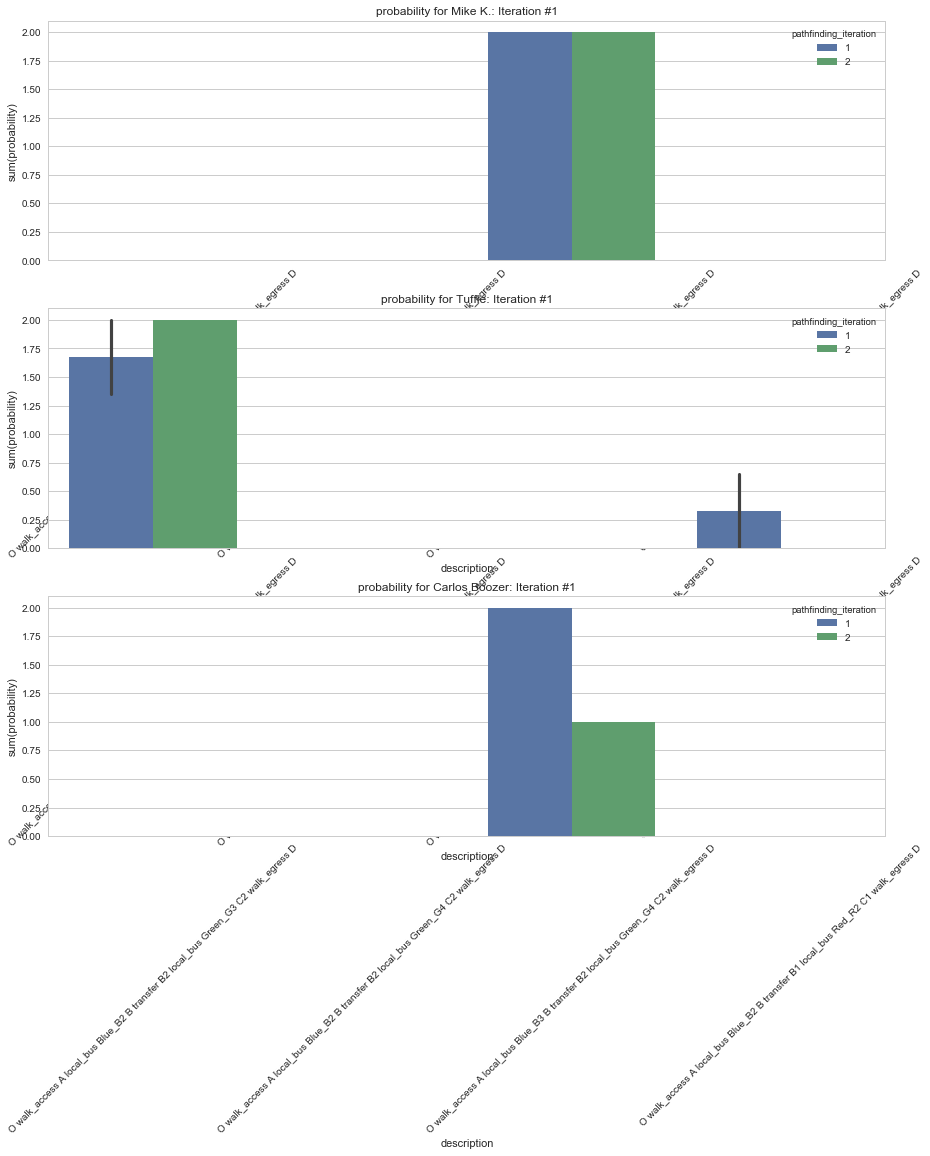

In [6]:
paths_df = pd.read_csv(os.path.join(OUTPUT_FOLDER,"pathset_paths.csv"), sep=",")

choice_set_plot(paths_df,["Mike K.", "Tuffie","Carlos Boozer"])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def choice_set_facet_plot(paths_df, pax_list=None, value="probability",iteration=1):
    paths_df[value].fillna(-1,inplace=True)
    if pax_list:
        paths_df = paths_df[paths_df['person_id'].isin(pax_list)]
    
    paths_df=paths_df[paths_df["iteration"]==iteration]
    
    description = paths_df.description.unique()
    
    sns.set(style="whitegrid")
    g = sns.FacetGrid(paths_df, row="person_id",
                     palette= "muted", size=4, aspect=4)
    g.map(sns.barplot, 'description', value,"pathfinding_iteration",order=description,palette= "muted")
    g.set_xticklabels(rotation=30)
    g.add_legend()
    


//anaconda/envs/fast-trips-develop/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


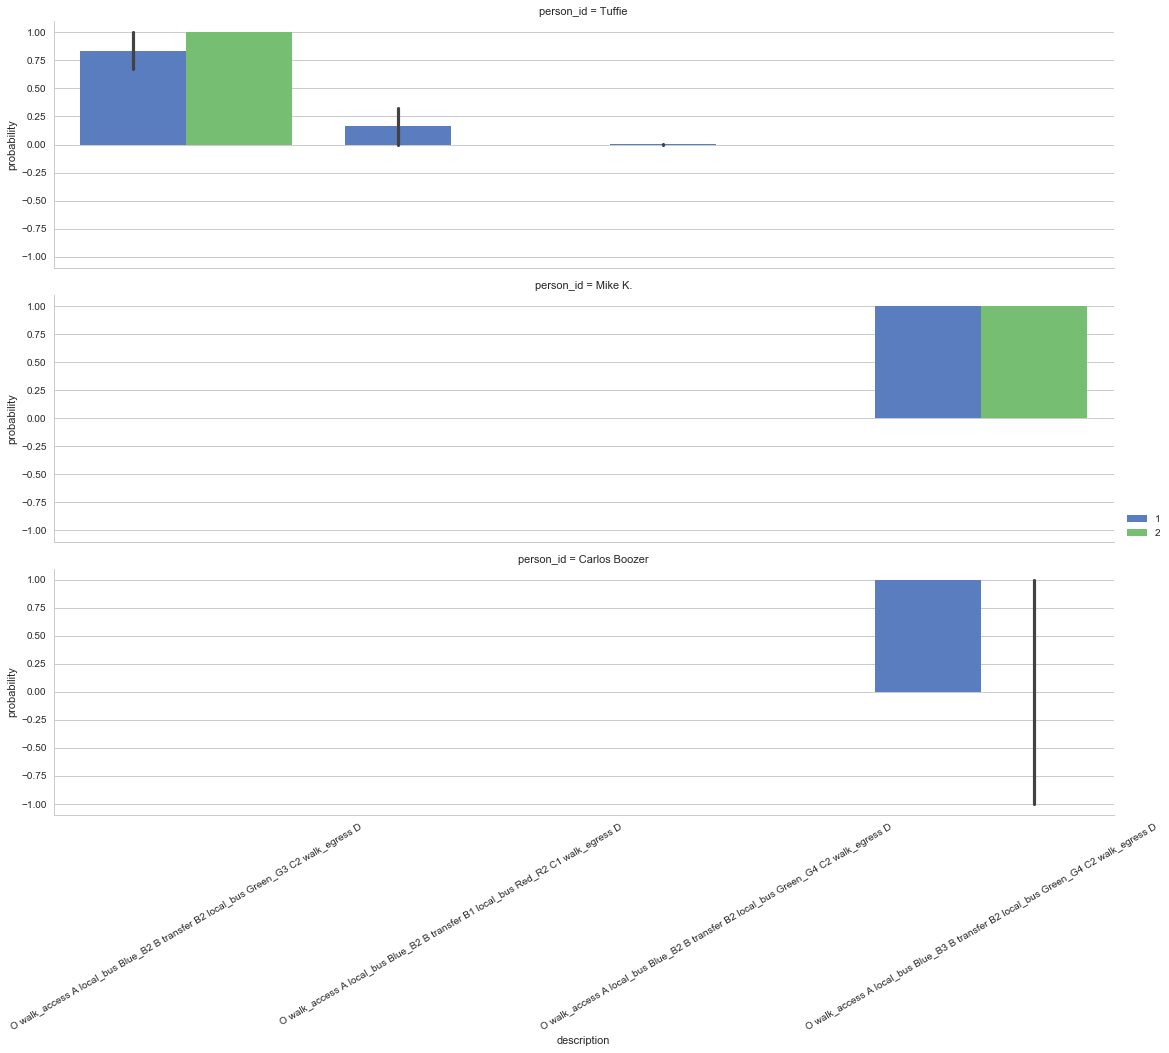

In [2]:
import graphs_ft
%matplotlib inline
paths_df = pd.read_csv(os.path.join(OUTPUT_FOLDER,"pathset_paths.csv"), sep=",")
graphs_ft.choice_set_facet_plot_single_iter(paths_df,["Mike K.", "Tuffie","Carlos Boozer"],iteration=1)

### Create Chart of Single Person Across Iterations

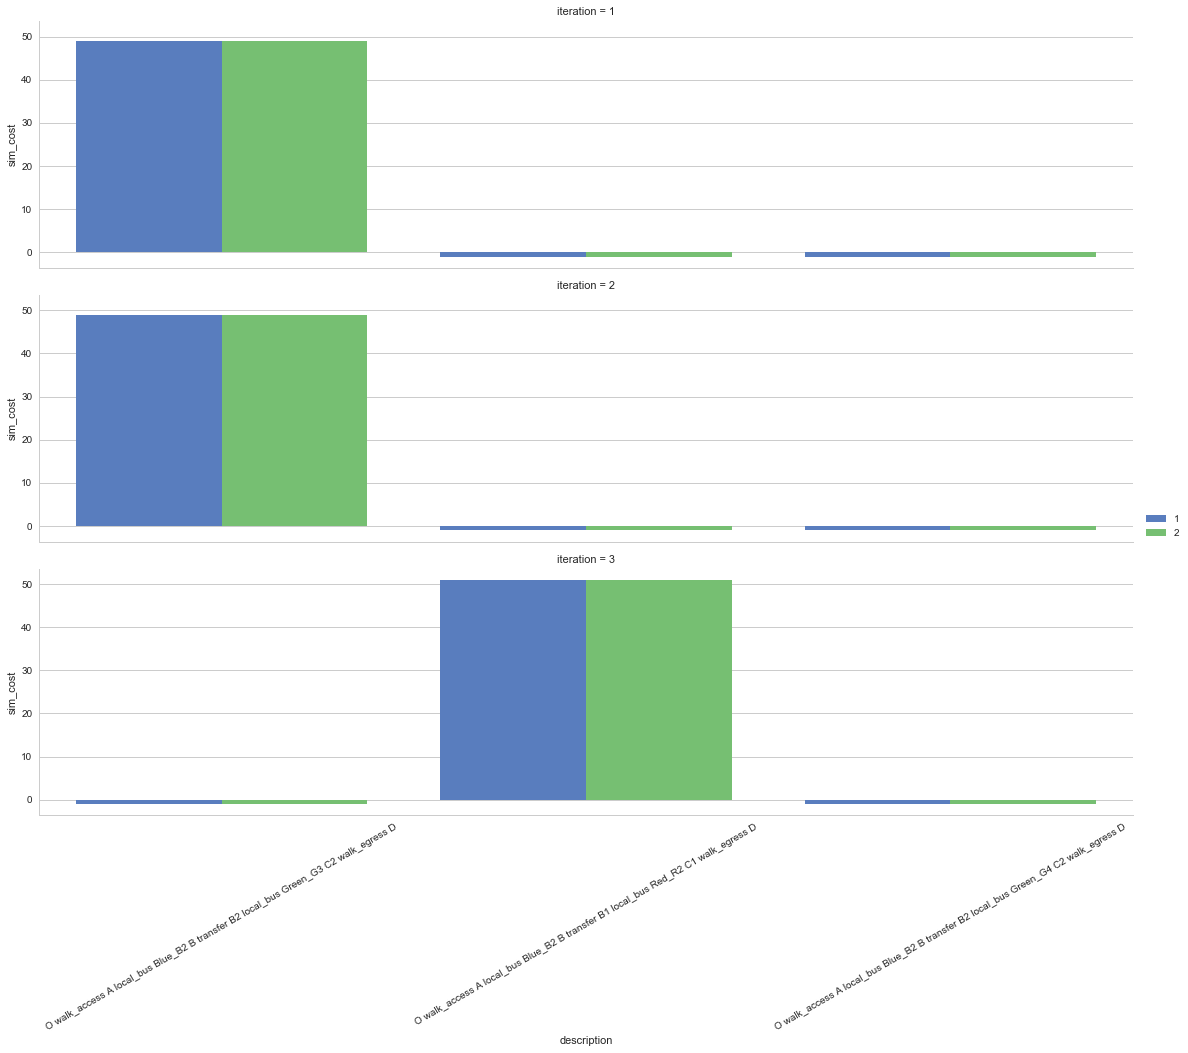

In [3]:
import graphs_ft
paths_df = pd.read_csv(os.path.join(OUTPUT_FOLDER,"pathset_paths.csv"), sep=",")
graphs_ft.choice_set_facet_plot_single_pax(paths_df,pax="Tuffie",value="sim_cost")


In [10]:
##SPACE TIME
import matplotlib.pyplot as plt
from pylab import *
BASE_DIR         = r"/Users/elizabeth/Documents/urbanlabs/MTC/SHRP2/tutorial"
INPUT_NETWORKS   = os.path.join(BASE_DIR, "tta","input","network-simple")
import transitfeed
loader        = transitfeed.Loader(INPUT_NETWORKS, memory_db=True)
schedule      = loader.Load()

routes_ft.txt
The file named routes_ft.txt was not expected.
This may be a misspelled file name or the file may be included in a
subdirectory. Please check spellings and make sure that there are no
subdirectories within the feed
transfers_ft.txt
The file named transfers_ft.txt was not expected.
This may be a misspelled file name or the file may be included in a
subdirectory. Please check spellings and make sure that there are no
subdirectories within the feed
trips_ft.txt
The file named trips_ft.txt was not expected.
This may be a misspelled file name or the file may be included in a
subdirectory. Please check spellings and make sure that there are no
subdirectories within the feed
vehicles_ft.txt
The file named vehicles_ft.txt was not expected.
This may be a misspelled file name or the file may be included in a
subdirectory. Please check spellings and make sure that there are no
subdirectories within the feed
walk_access_ft.txt
The file named walk_access_ft.txt was not expected.
This 

In [ ]:
import gtfs_plus

# approximate crow fly distance from O to D as:
# min walk distance from O to stop + 
# min walk distance from stop to D +
# crow fly distance between those stops

#OD Names
OD=("O","D")

#find min walk access
walk_access_df = pd.read_csv(os.path.join(INPUT_NETWORKS,"walk_access_ft.txt"), sep=",")

origin_walk             = walk_access_df[(walk_access_df["taz"]==OD[0]) & (walk_access_df["direction"]=="access")]
min_origin_walk         = origin_walk.ix[origin_walk['dist'].idxmin()]
min_origin_walk_dist    = min_origin_walk['dist']
min_origin_walk_stop_id = min_origin_walk['stop_id']
origin_stop = schedule.stops[min_origin_walk_stop_id]

dest_walk             = walk_access_df[(walk_access_df["taz"]==OD[0]) & (walk_access_df["direction"]=="egress")]
min_dest_walk         = dest_walk.ix[dest_walk['dist'].idxmin()]
min_dest_walk_dist    = min_dest_walk['dist']
min_dest_walk_stop_id = min_dest_walk['stop_id']
dest_stop = schedule.stops[min_destination_walk_stop_id]

stop_dist = gtfs_plus.haversine((origin_stop.stop_lat,origin_stop.stop_lon),(dest_stop.stop_lat,dest_stop.stop_lon))

total_crowfly_dist = stop_dist + min_origin_walk_dist + min_dest_walk_dist




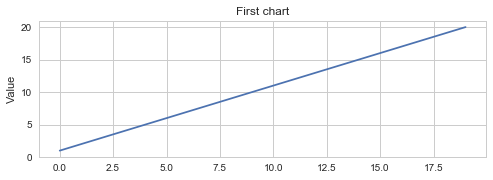

In [9]:
t = arange(0.0, 20.0, 1)
s = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
s2 = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
 
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.ylabel('Value')
plt.title('First chart')
plt.grid(True)